##Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [32]:
data_train = pd.read_csv('/content/drive/MyDrive/Kaggle Data/Kaggle - House Price Prediction/train.csv')

In [24]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##Univarient Analysis

In [5]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

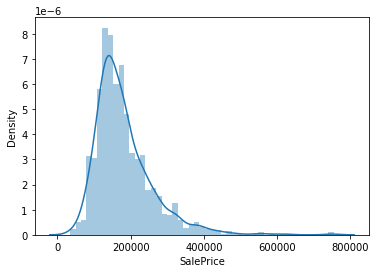

In [6]:
#histogram
sns.distplot(data_train['SalePrice']);

In [7]:
#skewness and kurtosis
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


##Univariant Analysis

Taking the imp correlated columns to Saleprice And Dropping the values which are less than 0.3

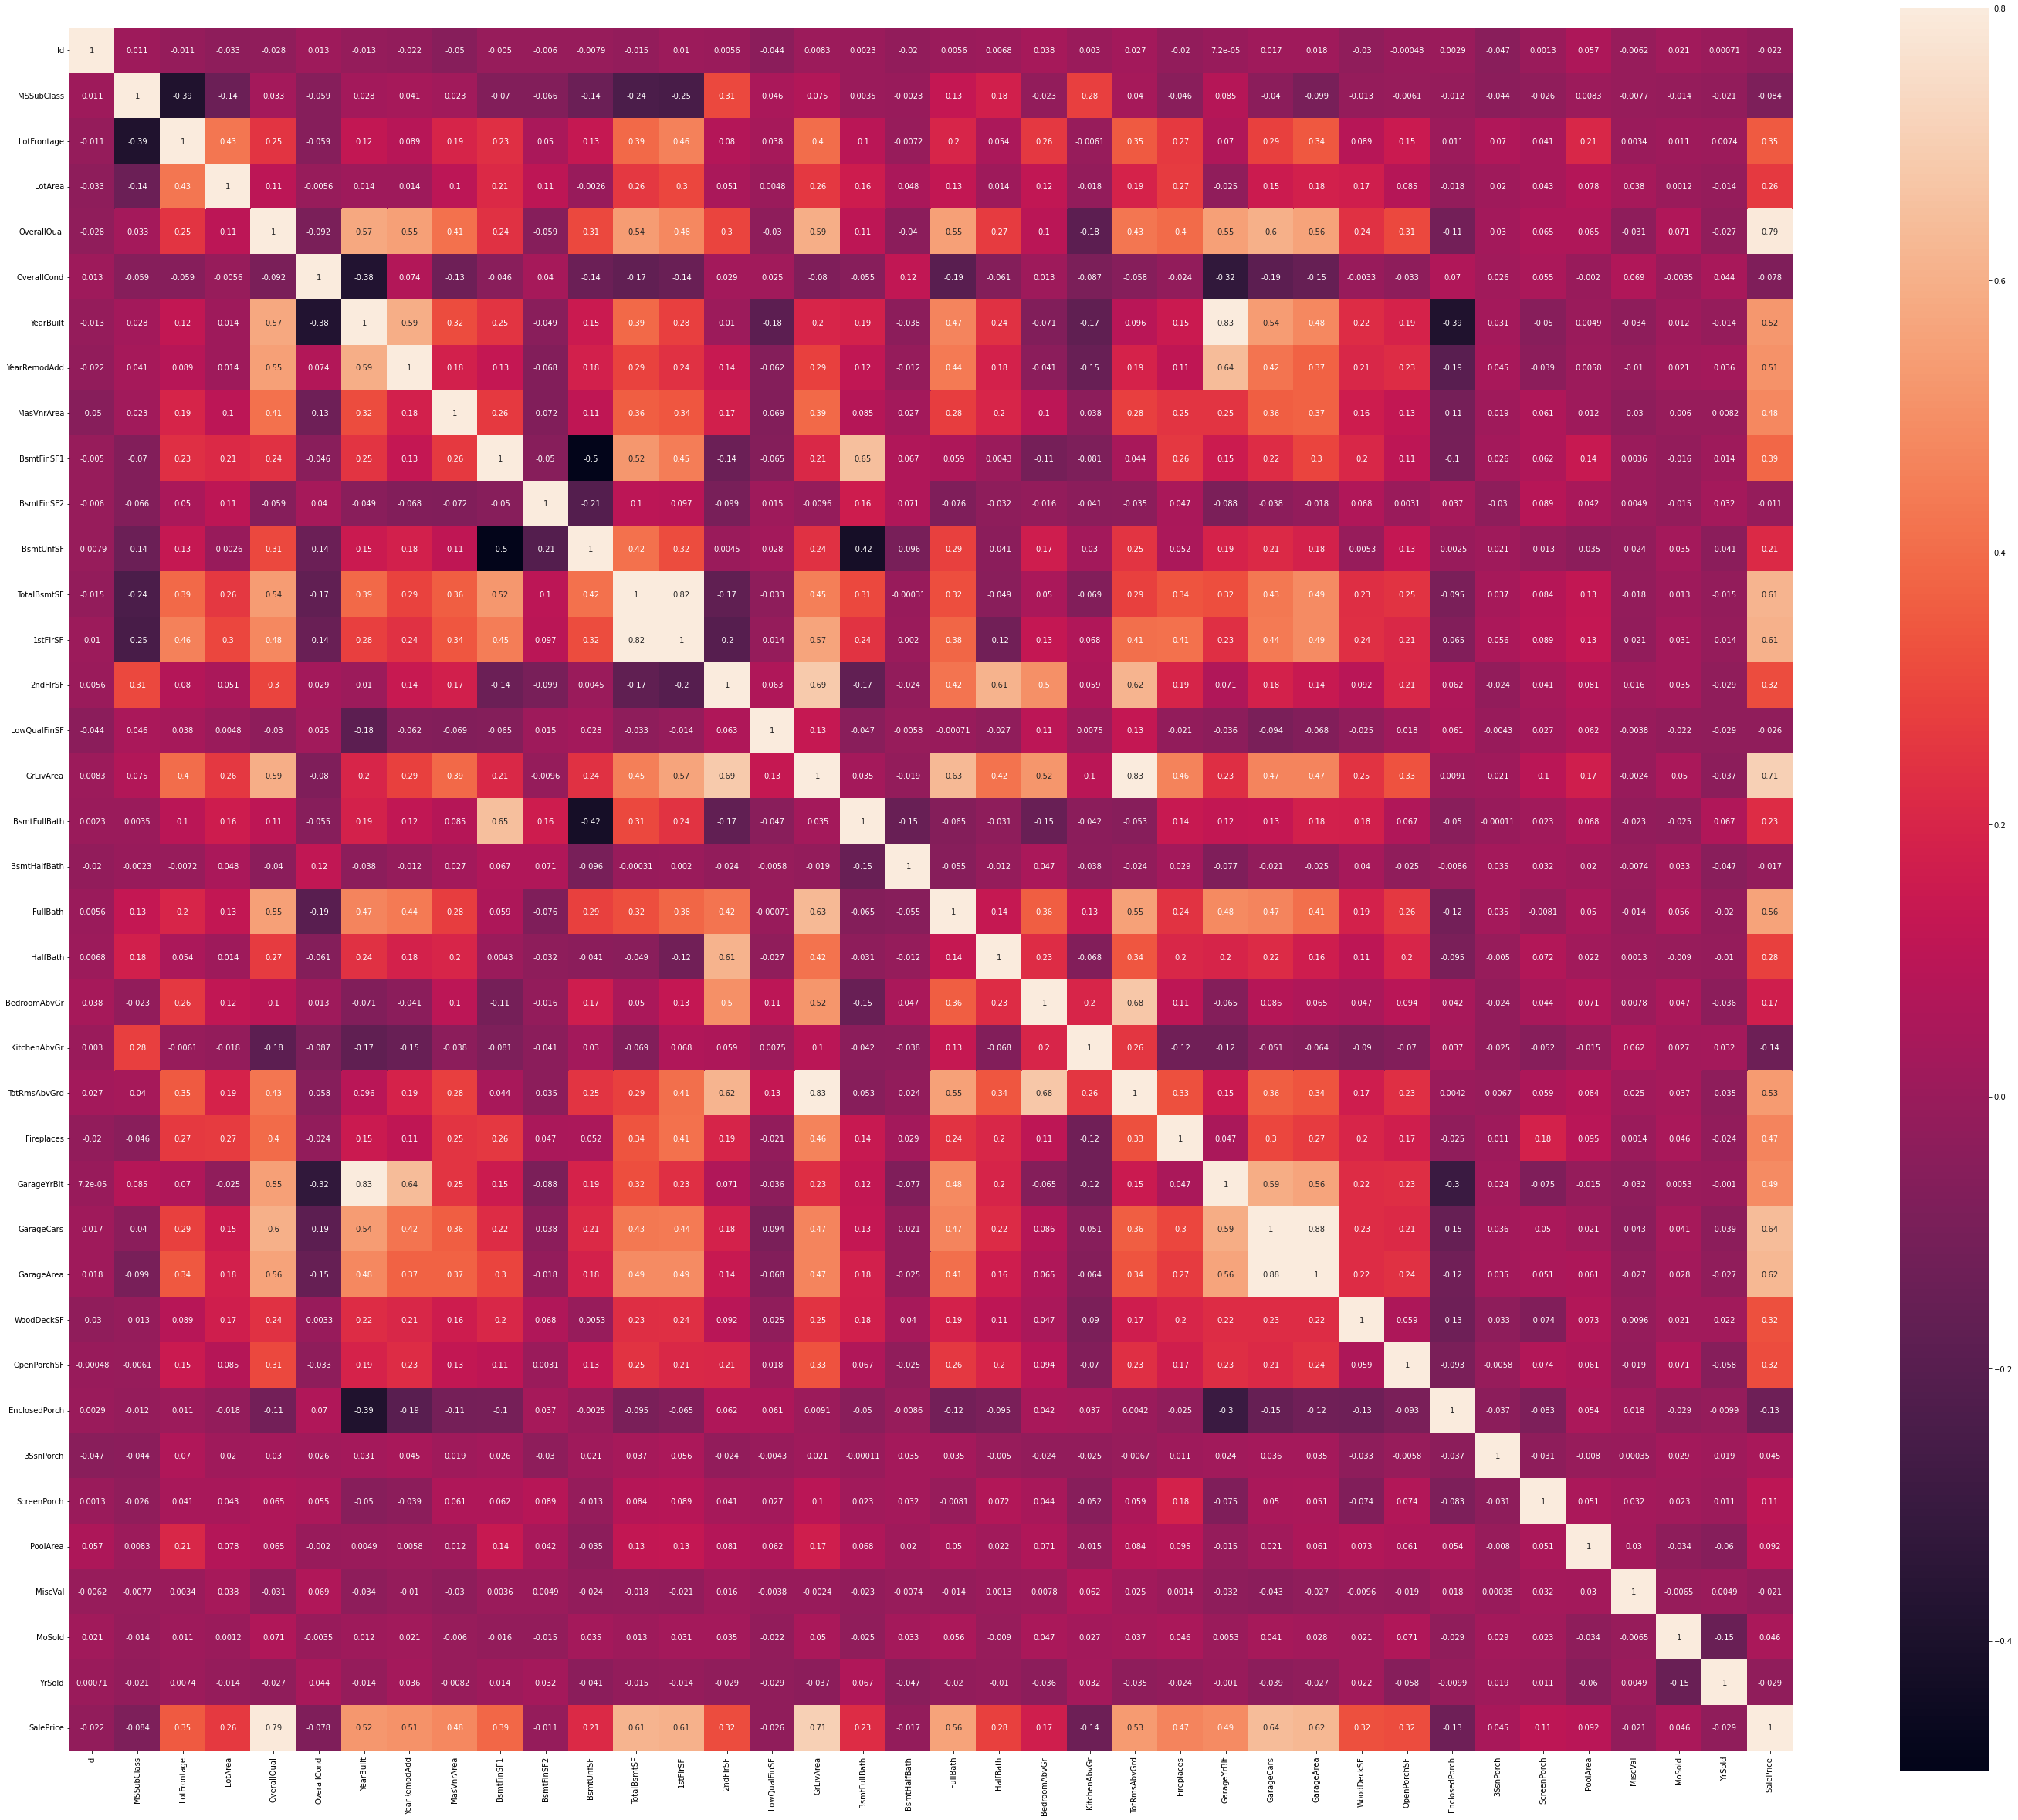

In [8]:
#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(50, 42))
sns.heatmap(corrmat,annot = True, vmax=.8, square=True);

In [40]:
data_train.columns

Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [25]:
data_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


###Dropping The columns

In [36]:
data_train.drop(["Id","MSSubClass","LotArea","OverallCond","BsmtFinSF2","BsmtUnfSF","LowQualFinSF","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold"], axis=1, inplace=True)

### Dropping the Multicolliniarty columns which have above >0.7 

In [41]:
data_train.drop(["GarageYrBlt","1stFlrSF","TotRmsAbvGrd","GarageArea"], axis=1, inplace=True)

In [43]:
data_train.shape

(1460, 58)

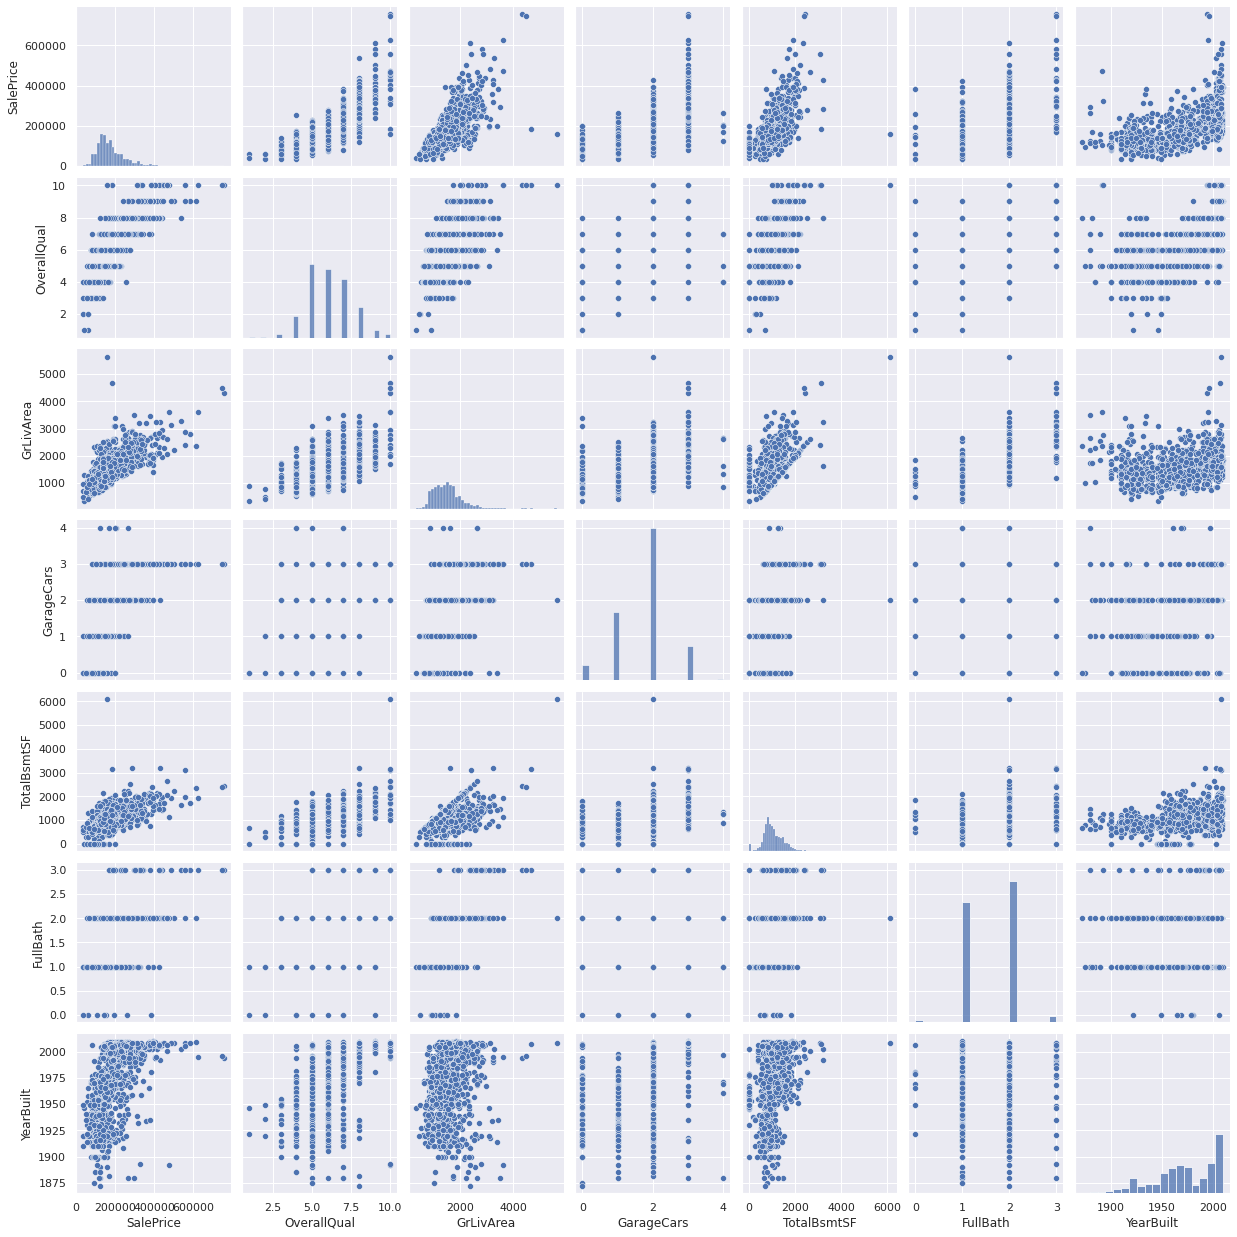

In [44]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show();

##Missing Data

In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   Street         1460 non-null   object 
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

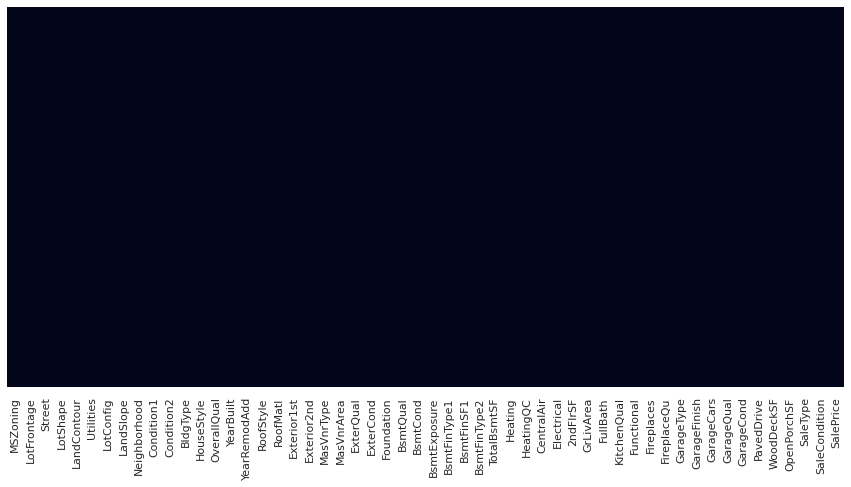

In [75]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False)

In [74]:
## Fill Missing Values

data_train['LotFrontage']=data_train['LotFrontage'].fillna(data_train['LotFrontage'].mean())
data_train['MasVnrArea']=data_train['MasVnrArea'].fillna(data_train['MasVnrArea'].mean())



In [54]:
data_train.drop(["Alley"], axis=1, inplace=True)

In [56]:
data_train['BsmtCond']=data_train['BsmtCond'].fillna(data_train['BsmtCond'].mode()[0])
data_train['BsmtQual']=data_train['BsmtQual'].fillna(data_train['BsmtQual'].mode()[0])

In [73]:
data_train['BsmtExposure']=data_train['BsmtExposure'].fillna(data_train['BsmtExposure'].mode()[0])
data_train['BsmtFinType1']=data_train['BsmtFinType1'].fillna(data_train['BsmtFinType1'].mode()[0])
data_train['BsmtFinType2']=data_train['BsmtFinType2'].fillna(data_train['BsmtFinType2'].mode()[0])

data_train['FireplaceQu']=data_train['FireplaceQu'].fillna(data_train['FireplaceQu'].mode()[0])
data_train['GarageType']=data_train['GarageType'].fillna(data_train['GarageType'].mode()[0])
data_train['GarageFinish']=data_train['GarageFinish'].fillna(data_train['GarageFinish'].mode()[0])
data_train['GarageQual']=data_train['GarageQual'].fillna(data_train['GarageQual'].mode()[0])
data_train['GarageCond']=data_train['GarageCond'].fillna(data_train['GarageCond'].mode()[0])
data_train['MasVnrType']=data_train['MasVnrType'].fillna(data_train['MasVnrType'].mode()[0])
data_train['Electrical']=data_train['Electrical'].fillna(data_train['Electrical'].mode()[0])





In [68]:
data_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
data_train.isnull().sum()

In [115]:
data_train.shape

(1460, 54)

In [114]:
data_train.dropna(inplace=True)

In [79]:
data_train.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,2,TA,TA,Y,0,61,WD,Normal,208500
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,2,TA,TA,Y,298,0,WD,Normal,181500
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,2,TA,TA,Y,0,42,WD,Normal,223500
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,3,TA,TA,Y,0,35,WD,Abnorml,140000
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,3,TA,TA,Y,192,84,WD,Normal,250000


In [82]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [83]:
columns = data_train.select_dtypes(include=['object']).columns.tolist()

In [86]:
len(columns)

39

In [94]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [106]:
main_data=data_train.copy()

In [108]:
## Combine Test Data 

data_test=pd.read_csv('/content/drive/MyDrive/Kaggle Data/Kaggle - House Price Prediction/formulatedtest.csv')

In [109]:
data_test.shape

(1459, 53)

In [110]:
data_test.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RH,80.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,1.0,TA,TA,Y,140,0,WD,Normal
1,RL,81.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,1.0,TA,TA,Y,393,36,WD,Normal
2,RL,74.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,2.0,TA,TA,Y,212,34,WD,Normal
3,RL,78.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,2.0,TA,TA,Y,360,36,WD,Normal
4,RL,43.0,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,2.0,TA,TA,Y,0,82,WD,Normal


In [111]:
final_df=pd.concat([data_train,data_test],axis=0)

In [112]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [113]:
final_df.shape

(2919, 54)

In [116]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [117]:
final_df.shape

(2919, 215)

In [118]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [119]:
final_df.shape

(2919, 155)

In [120]:
final_df

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,65.0,7,2003,2003,196.0,706.0,856.0,854,1710,2,...,0,0,0,0,1,0,0,0,1,0
1,80.0,6,1976,1976,0.0,978.0,1262.0,0,1262,2,...,0,0,0,0,1,0,0,0,1,0
2,68.0,7,2001,2002,162.0,486.0,920.0,866,1786,2,...,0,0,0,0,1,0,0,0,1,0
3,60.0,7,1915,1970,0.0,216.0,756.0,756,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,8,2000,2000,350.0,655.0,1145.0,1053,2198,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,4,1970,1970,0.0,0.0,546.0,546,1092,1,...,0,0,0,0,1,0,0,0,1,0
1455,21.0,4,1970,1970,0.0,252.0,546.0,546,1092,1,...,0,0,0,0,1,0,0,0,0,0
1456,160.0,5,1960,1996,0.0,1224.0,1224.0,0,1224,1,...,0,0,0,0,1,0,0,0,0,0
1457,62.0,5,1992,1992,0.0,337.0,912.0,0,970,1,...,0,0,0,0,1,0,0,0,1,0


In [121]:
data_Train=final_df.iloc[:1460,:]
data_Test=final_df.iloc[1460:,:]

In [122]:
data_Train.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,65.0,7,2003,2003,196.0,706.0,856.0,854,1710,2,...,0,0,0,0,1,0,0,0,1,0
1,80.0,6,1976,1976,0.0,978.0,1262.0,0,1262,2,...,0,0,0,0,1,0,0,0,1,0
2,68.0,7,2001,2002,162.0,486.0,920.0,866,1786,2,...,0,0,0,0,1,0,0,0,1,0
3,60.0,7,1915,1970,0.0,216.0,756.0,756,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,8,2000,2000,350.0,655.0,1145.0,1053,2198,2,...,0,0,0,0,1,0,0,0,1,0


In [123]:
data_Test.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,80.0,5,1961,1961,0.0,468.0,882.0,0,896,1,...,0,0,0,0,1,0,0,0,1,0
1,81.0,6,1958,1958,108.0,923.0,1329.0,0,1329,1,...,0,0,0,0,1,0,0,0,1,0
2,74.0,5,1997,1998,0.0,791.0,928.0,701,1629,2,...,0,0,0,0,1,0,0,0,1,0
3,78.0,6,1998,1998,20.0,602.0,926.0,678,1604,2,...,0,0,0,0,1,0,0,0,1,0
4,43.0,8,1992,1992,0.0,263.0,1280.0,0,1280,2,...,0,0,0,0,1,0,0,0,1,0


In [124]:
data_Test.drop(['SalePrice'],axis=1,inplace=True)

In [125]:
X_train=data_Train.drop(['SalePrice'],axis=1)
y_train=data_Train['SalePrice']

##Prediciton and selecting the Algorithm

In [126]:
import xgboost
classifier=xgboost.XGBRegressor()

In [127]:
import xgboost
regressor=xgboost.XGBRegressor()

In [128]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [129]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [132]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [133]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[17:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [135]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [137]:
regressor = xgboost.XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [138]:
regressor.fit(X_train,y_train)

[17:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [139]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [142]:
data_Test.shape

(1459, 154)

In [143]:
data_Test.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,80.0,5,1961,1961,0.0,468.0,882.0,0,896,1,...,0,0,0,0,1,0,0,0,1,0
1,81.0,6,1958,1958,108.0,923.0,1329.0,0,1329,1,...,0,0,0,0,1,0,0,0,1,0
2,74.0,5,1997,1998,0.0,791.0,928.0,701,1629,2,...,0,0,0,0,1,0,0,0,1,0
3,78.0,6,1998,1998,20.0,602.0,926.0,678,1604,2,...,0,0,0,0,1,0,0,0,1,0
4,43.0,8,1992,1992,0.0,263.0,1280.0,0,1280,2,...,0,0,0,0,1,0,0,0,1,0


In [145]:
y_pred=regressor.predict(data_Test)

In [153]:
y_pred

array([112742.375, 156772.69 , 183976.22 , ..., 176987.02 , 125894.836,
       235059.3  ], dtype=float32)

In [158]:
test_data = pd.read_csv('/content/drive/MyDrive/Kaggle Data/Kaggle - House Price Prediction/test.csv')

In [160]:
data = {'ID': test_data['Id'],
        'SalePrice': y_pred,}

Data_test_prediction = pd.DataFrame(data)

In [161]:
Data_test_prediction.head()

,ID,SalePrice
0,1461,112742.37500
1,1462,156772.68750
2,1463,183976.21875
3,1464,186774.34375
4,1465,194949.46875


In [162]:
Data_test_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


In [163]:
Data_test_prediction.to_csv('Test_predictions.csv',index=False)